### Black Friday Dataset EDA and feature Engineering

Cleaning and Preparing the data for model training 

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the datasets

In [2]:
df_train = pd.read_csv('train.csv.zip')
df_train.shape

(550068, 12)

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test = pd.read_csv('test.csv.zip')
df_test.shape

(233599, 11)

In [5]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


#### Combine the two dataset

1. pd.concat()-- Append below the dataset.
2. append()--   Append below the dataset. 
			  The frame.append method is deprecated and will be removed from pandas in a future version.					 
			  Use pandas.concat instead.
3. pd.Merge()-- Increases columns (Merge dataset side by side)

In [6]:
#pd.concat() it increases columns

final_df = pd.concat([df_train , df_test])

In [7]:
final_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


Drop unnecessary columns from the dataframe

In [8]:
final_df.drop(['User_ID' , 'Product_ID' ] , axis = 1 , inplace =True)

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 65.8+ MB


In [10]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [11]:
final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].str.replace('+' , '')

C:\Users\DELL\AppData\Local\Temp\ipykernel_18988\3757629780.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].str.replace('+' , '')


In [12]:
final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].astype(int)

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 62.8+ MB


In [14]:
Cat_features = final_df.select_dtypes(include='object')
Cat_features.head()

,Gender,Age,City_Category
0,F,0-17,A
1,F,0-17,A
2,F,0-17,A
3,F,0-17,A
4,M,55+,C


In [15]:
Num_features = final_df.select_dtypes(exclude='object')
Num_features.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,2,0,3,NaN,NaN,8370.0
1,10,2,0,1,6.0,14.0,15200.0
2,10,2,0,12,NaN,NaN,1422.0
3,10,2,0,12,14.0,NaN,1057.0
4,16,4,0,8,NaN,NaN,7969.0


In [16]:
final_df.describe()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,8.079300,1.858247,0.409777,5.366196,9.844506,12.668605,9263.968713
std,6.522206,1.288790,0.491793,3.878160,5.089093,4.125510,5023.065394
min,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,1.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,3.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [17]:
final_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4,0,8,NaN,NaN,7969.0


In [18]:
final_df.shape

(783667, 10)

#### Handle Missing Values

In [19]:
final_df.shape                 # DataFrame.shape[0] = Rows count and DataFrame.shape[1] = columns count

(783667, 10)

In [20]:
final_df.isnull().values.any()   #Checks if their is any null values in entire dataframe or not 

True

In [21]:
#Get the total number of null values with respect to resp. columns.

final_df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [22]:
len(final_df)           # Row count of a DataFrame using len()

783667

In [23]:
len(final_df.index)     # for slightly improved performance

783667

In [24]:
#Percentage of missing values 

percent_missing = final_df.isnull().sum()*100/len(final_df.index)
percent_missing

Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
dtype: float64

#### Observation:
    
So here for the Product_Category_3 the percentage of missing null values over 60% so as a repurcussion of that we can remove 
that column to get better output.

#### Focus on replacing missing values 

In [25]:
final_df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

#Replacing nan with mode 

In [26]:
final_df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [27]:
final_df['Product_Category_2'].mode()[0]

8.0

In [28]:
#Replace nan with mode of Product_Category_2.
#We can't use mean because it will create a new category all together.

final_df['Product_Category_2'] = final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0])

In [29]:
#check null values 

final_df['Product_Category_2'].isnull().sum()

0

In [30]:
final_df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [31]:
final_df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [32]:
final_df['Product_Category_3'] = final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0])

In [33]:
#Check null values

final_df['Product_Category_3'].isnull().sum()

0

In [34]:
final_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,M,55+,16,C,4,0,8,8.0,16.0,7969.0


In [35]:
final_df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [36]:
final_df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

#### Observation:
We have successfully handled all missing values in our dataset except for Purchase feature because we have combined train and test
dataset so it will be null on that we will predict customer's purchasing capacity for various products.

#### Let's get some detail observstions from black friday dataset in visual representation.

In [37]:
#How many male and female customer's we have

gender_count = final_df.groupby(['Gender']).size().reset_index().rename(columns={0 : 'count'})
gender_count

,Gender,count
0,F,193636
1,M,590031


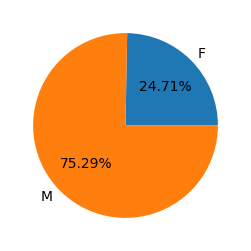

In [49]:
plt.rcParams["figure.figsize"] = [5,3]
plt.pie(data = gender_count ,x = 'count' , autopct='%1.2f%%' , labels = 'Gender' )
plt.show()

#### Observation:
* We have around 75% male customers.
* We can see that the purchase capacity of men is more than women.

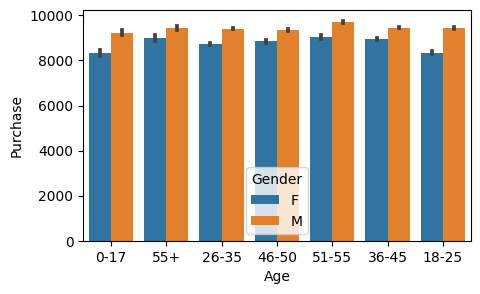

In [51]:
sns.barplot(data = final_df , x = 'Age' , y = 'Purchase' , hue = 'Gender')
plt.show()

#### Observation:
We can see that the men's are purchasing more than women in every age group.

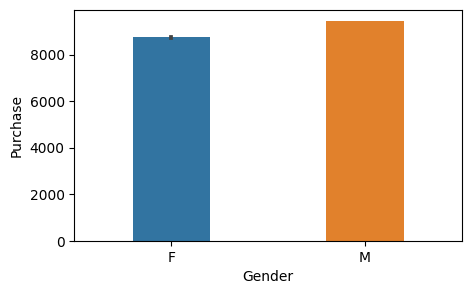

In [52]:
sns.barplot(data = final_df , x = 'Gender' , y = 'Purchase' , width = 0.4)
plt.show()

#### Observation:
We can clearly see that the male purchase is higher than female.

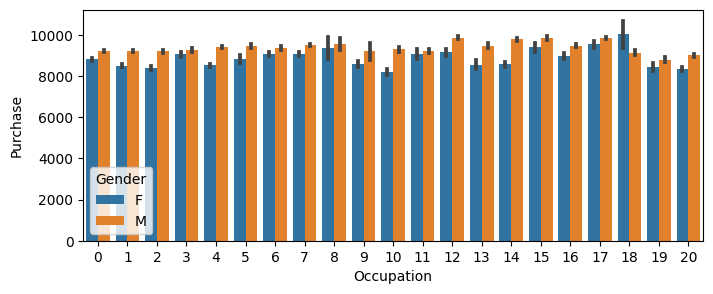

In [60]:
plt.figure(figsize=(8,3))
sns.barplot(data = final_df , x = 'Occupation' , y = 'Purchase' , hue = 'Gender')
plt.show()

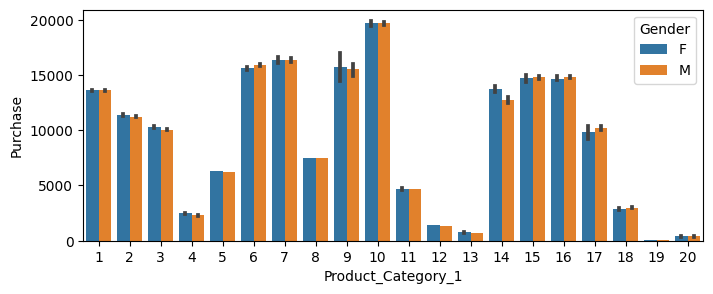

In [61]:
plt.figure(figsize=(8,3))
sns.barplot(data = final_df , x = 'Product_Category_1' , y = 'Purchase' , hue = 'Gender')
plt.show()

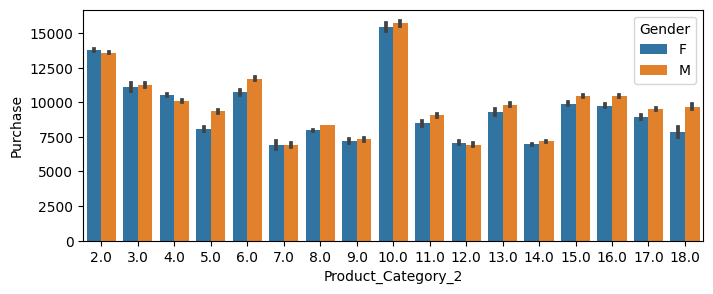

In [58]:
plt.figure(figsize=(8,3))
sns.barplot(data = final_df , x = 'Product_Category_2' , y = 'Purchase' , hue = 'Gender')
plt.show()

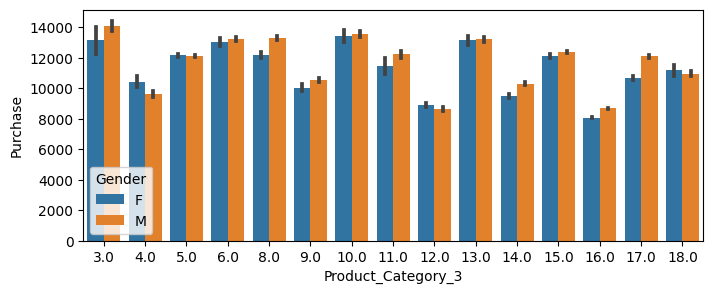

In [59]:
plt.figure(figsize=(8,3))
sns.barplot(data = final_df , x = 'Product_Category_3' , y = 'Purchase' , hue = 'Gender')
plt.show()

#### Observation:
We can see that the product category 1 has highest purchase followed by product category 1.

### Handle Catgorical features

In [62]:
final_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,M,55+,16,C,4,0,8,8.0,16.0,7969.0


In [65]:
Cat_features.head()

,Gender,Age,City_Category
0,F,0-17,A
1,F,0-17,A
2,F,0-17,A
3,F,0-17,A
4,M,55+,C


In [68]:
final_df['Gender'] = pd.get_dummies(final_df['Gender'] , drop_first=True)

In [70]:
final_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [72]:
final_df['Age'] = final_df['Age'].map({'0-17':1 , '55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6, '18-25':7 })

In [79]:
final_df_city = pd.get_dummies(final_df['City_Category'] , drop_first=True)
final_df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [85]:
final_df = pd.concat([final_df , final_df_city] , axis = 1)
final_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,B,C
0,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0,0,0
2,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0,0,0
3,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0,0,0
4,1,2,16,C,4,0,8,8.0,16.0,7969.0,0,1,0,1


In [86]:
final_df.drop('City_Category' , axis = 1 , inplace=True)

In [89]:
final_df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0,0,0
4,1,2,16,4,0,8,8.0,16.0,7969.0,0,1,0,1


#### Great! We have a pretty good job

#### Next we can do feature scaling and train our model.